In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    convergence = np.array([])
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        # Check for convergence
        convergence = np.append(convergence, np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, convergence
        x = x_new
    return x, max_iterations, convergence

In [2]:
def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    convergence = np.array([])
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        # Check for convergence
        convergence = np.append(convergence, np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, convergence
        x = x_new
    return x, max_iterations, convergence

In [3]:
def plot(iterations_jacobi, iterations_gauss, convergence_jacobi, convergence_gauss, tol):
    plt.plot(range(iterations_jacobi + 1), convergence_jacobi, 'b.')
    plt.xlabel('Iteration')
    plt.ylabel('Convergence')
    plt.title(f'Jacobi Tolerance: {tol}')
    plt.show()
    
    plt.plot(range(iterations_gauss + 1), convergence_gauss, 'r.')
    plt.xlabel('Iteration')
    plt.ylabel('Convergence')
    plt.title(f'Gauss-Seidel Tolerance: {tol}')
    plt.show()

    print(f"Jacobi Iterations: {iterations_jacobi}")
    print(f"Gauss-Seidel Iterations: {iterations_gauss}")

In [4]:
A = np.array([[3, -0.1, -0.2],
              [0.1, 7, -0.3],
              [0.3, -0.2, 10]], dtype = float)
b = np.array([7.85, -19.3, 71.4], dtype = float)
x0 = np.zeros_like(b)
tol1 = 1e-3
tol2 = 1e-6
tol3 = 1e-9
max_iterations = 100

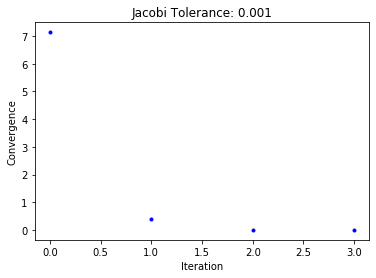

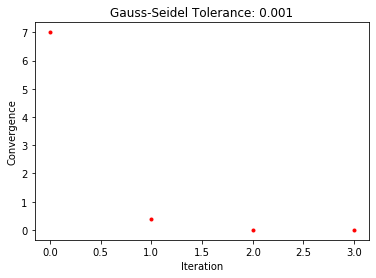

Jacobi Iterations: 3
Gauss-Seidel Iterations: 3


In [5]:
solution_jacobi1, iterations_jacobi1, convergence_jacobi1 = jacobi(A, b, x0, tol1, max_iterations)
solution_gauss1, iterations_gauss1, convergence_gauss1 = gauss_seidel(A, b, x0, tol1, max_iterations)
plot(iterations_jacobi1, iterations_gauss1, convergence_jacobi1, convergence_gauss1, tol1)

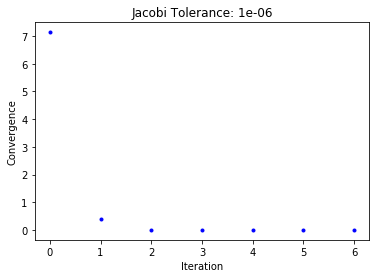

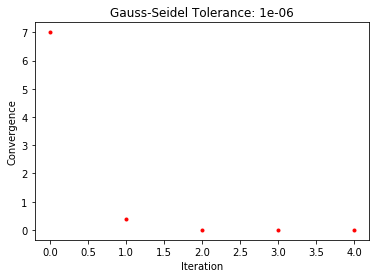

Jacobi Iterations: 6
Gauss-Seidel Iterations: 4


In [6]:
solution_jacobi2, iterations_jacobi2, convergence_jacobi2 = jacobi(A, b, x0, tol2, max_iterations)
solution_gauss2, iterations_gauss2, convergence_gauss2 = gauss_seidel(A, b, x0, tol2, max_iterations)
plot(iterations_jacobi2, iterations_gauss2, convergence_jacobi2, convergence_gauss2, tol2)

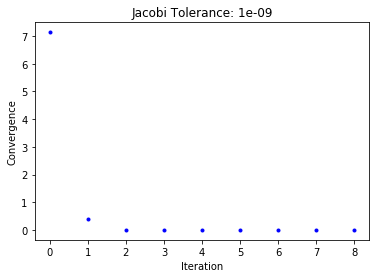

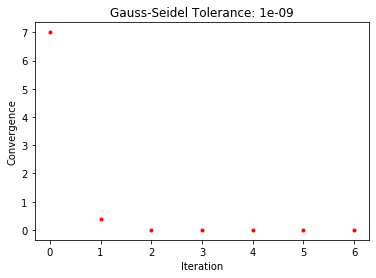

Jacobi Iterations: 8
Gauss-Seidel Iterations: 6


In [7]:
solution_jacobi3, iterations_jacobi3, convergence_jacobi3 = jacobi(A, b, x0, tol3, max_iterations)
solution_gauss3, iterations_gauss3, convergence_gauss3 = gauss_seidel(A, b, x0, tol3, max_iterations)
plot(iterations_jacobi3, iterations_gauss3, convergence_jacobi3, convergence_gauss3, tol3)

## As the tolerance gets closer to 0, the number of iterations needed for convergence increases.